<xray.DataArray 'SM' (T: 101, points: 101)>
array([[ 57.33829323,  57.33829323,  57.33829323, ...,  57.33829323,
         57.33829282,  57.33829323],
       [ 57.66406488,  57.66406488,  57.66406488, ...,  57.66406488,
         57.66406447,  57.66406488],
       [ 57.98614424,  57.98614424,  57.98614424, ...,  57.98614424,
         57.98614383,  57.98614424],
       ..., 
       [ 80.01166933,  80.01166933,  80.01166933, ...,  80.01166933,
         80.01166898,  80.01166933],
       [ 80.18713835,  80.18713835,  80.18713835, ...,  80.18713835,
         80.18713799,  80.18713835],
       [ 80.36186401,  80.36186401,  80.36186401, ...,  80.36186401,
         80.36186366,  80.36186401]])
Coordinates:
    P        float64 1e+05
  * points   (points) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * T        (T) float64 1e+03 1.01e+03 1.02e+03 1.03e+03 1.04e+03 1.05e+03 ...


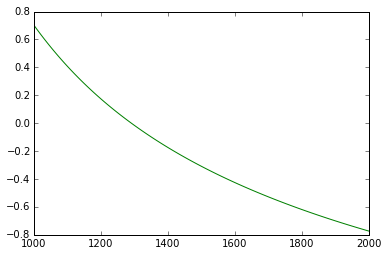

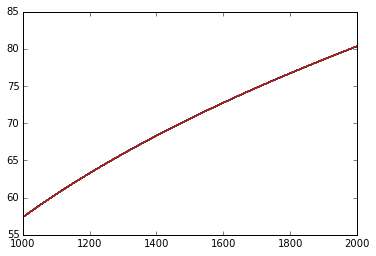

In [1]:
from pycalphad import Database, equilibrium, calculate
import pycalphad.variables as v
from numpy import *
from pylab import *

db = Database('alfe_sei.TDB')

R=8.31451
T=arange(1000,2001,10).astype(np.float)
xAl=0.9
xFe=1-xAl
data = equilibrium(db, ['AL', 'FE'], 'LIQUID', {v.X('AL'): xAl, v.T: T, v.P: 1e5},verbose=False)

muFe=data['MU'].sel( component='FE').data[0].flatten()
muAl=data['MU'].sel( component='AL').data[0].flatten()

data = equilibrium(db, ['AL', 'FE','VA'], 'AL13FE4', {v.X('AL'): 13.0/17.0, v.T: T, v.P: 1e5},verbose=False)
G=data['GM'].data[0].flatten()
dGM=-(G-(13/17.0)*muAl-(1-13/17.0)*muFe)/R/T
entropy = calculate(db, ['AL', 'FE', 'VA'], 'AL13FE4', output='SM', T=T, P=1e5,
                    points=data['Y'].isel(vertex=1, X_AL=0).values)

%matplotlib inline
figure(1)
plot(T,dGM,'g')
figure(2)
print(entropy['SM'].isel(P=0))
plot(T, entropy['SM'].isel(P=0))
show()

In [2]:
from pycalphad import Database, equilibrium, calculate

import pycalphad.variables as v
%matplotlib inline
from matplotlib import pyplot as plt

db = Database('/home/rotis/git/pycalphad/research/alfe_sei.TDB')


data = equilibrium(db, ['AL', 'FE','VA'], 'LIQUID',
                   {v.X('FE'): 0.73999999999999999, v.T: [401.0, 401.5625, 402.0], v.P: 1e5},verbose=False)
print(data)

<xray.Dataset>
Dimensions:       (P: 1, T: 3, X_FE: 1, component: 2, internal_dof: 2, vertex: 2)
Coordinates:
  * P             (P) float64 1e+05
  * T             (T) float64 401.0 401.6 402.0
  * X_FE          (X_FE) float64 0.74
  * vertex        (vertex) int64 0 1
  * component     (component) object 'AL' 'FE'
  * internal_dof  (internal_dof) int64 0 1
Data variables:
    NP            (P, T, X_FE, vertex) float64 0.9797 0.02031 0.9996 ...
    MU            (P, T, X_FE, component) float64 -5.559e+04 -2.738e+03 ...
    GM            (P, T, X_FE) float64 -1.648e+04 -1.651e+04 -1.653e+04
    X             (P, T, X_FE, vertex, component) float64 0.26 0.74 0.26 ...
    Y             (P, T, X_FE, vertex, internal_dof) float64 0.26 0.74 0.26 ...
    Phase         (P, T, X_FE, vertex) object u'LIQUID' u'LIQUID' u'LIQUID' ...
Attributes:
    iterations: 16


In [3]:
data = equilibrium(db, ['AL', 'FE','VA'], 'LIQUID',
                   {v.X('FE'): 0.73999999999999999, v.T: 401.5625, v.P: 1e5},verbose=False)
print(data)
data.MU.sel(T=401.5625, X_FE=0.74)

<xray.Dataset>
Dimensions:       (P: 1, T: 1, X_FE: 1, component: 2, internal_dof: 2, vertex: 2)
Coordinates:
  * P             (P) float64 1e+05
  * T             (T) float64 401.6
  * X_FE          (X_FE) float64 0.74
  * vertex        (vertex) int64 0 1
  * component     (component) object 'AL' 'FE'
  * internal_dof  (internal_dof) int64 0 1
Data variables:
    NP            (P, T, X_FE, vertex) float64 0.9996 0.0004248
    MU            (P, T, X_FE, component) float64 -5.561e+04 -2.768e+03
    GM            (P, T, X_FE) float64 -1.651e+04
    X             (P, T, X_FE, vertex, component) float64 0.26 0.74 0.26 0.74
    Y             (P, T, X_FE, vertex, internal_dof) float64 0.26 0.74 0.26 0.74
    Phase         (P, T, X_FE, vertex) object u'LIQUID' u'LIQUID'
Attributes:
    iterations: 16


<xray.DataArray 'MU' (P: 1, component: 2)>
array([[-55612.12889332,  -2767.66182082]])
Coordinates:
    X_FE       float64 0.74
  * component  (component) object 'AL' 'FE'
  * P          (P) float64 1e+05
    T          float64 401.6

('AL13FE4', ' x_liquid=', 0.0001, ' T=', 1200.0)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 800.0)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 600.0)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 700.0)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 750.0)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 725.0)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 712.5)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 718.75)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 715.625)
('AL13FE4', ' x_liquid=', 0.0001, ' T=', 714.0625)
Liquidus found
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1200.0)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 800.0)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1000.0)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1100.0)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1050.0)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1025.0)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1012.5)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1018.75)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1021.875)
('AL13FE4', ' x_liquid=', 0.02, ' T=', 1020.3125)
Liquidus found
('AL13FE

/home/rotis/anaconda/envs/calphad/lib/python2.7/site-packages/ipykernel/__main__.py:66: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


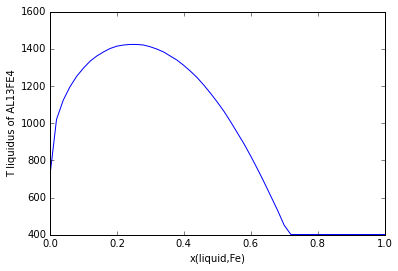

In [4]:
"""
Created on Wed Sep  9 09:06:53 2015

@author: ebrosh
"""

#import matplotlib.pyplot as plt
from pycalphad import Database, equilibrium
import pycalphad.variables as v
import numpy as np
from pylab import *





db = Database('/home/rotis/git/pycalphad/research/alfe_sei.TDB')





def nsolid(T,phase_name,x_liquid,db):
    # calculate number of moles of the solid phase
    print (phase_name,' x_liquid=',x_liquid,' T=',T)
    data = equilibrium(db, ['AL', 'FE','VA'], ['LIQUID',phase_name], {v.X('FE'): x_liquid, v.T: T, v.P: 1.0e5},verbose=False)
    n=data['NP'].values.flatten()
    phases=data['Phase'].values.flatten()
    n=sum(n[phases==phase_name])
    return n


def Liquidus2(phase_name,x_liquid,db):
    # find the first temperature at which the solid does not appear
    TlowBound=400.0
    ThighBound=2000.0
    tol=2.0

    min, max =TlowBound , ThighBound

    while (max - min) > tol:
        mid = .5*(min + max)

        n= nsolid(mid,phase_name,x_liquid,db)

        if  n== 0:
            max = mid
        else:
            min = mid

    T=mid
    print('Liquidus found')
    return T


# make calculation for n points of composition
n=50.0
irange=np.arange(0,n+1,1)
xrange=irange/n
xrange[0]=1.0e-4
xrange[-1]=.9999
T=np.zeros(size(irange))


for i in irange:
    T[i]=Liquidus2('AL13FE4',xrange[i],db)



figure(1)
plot(xrange,T)
xlabel('x(liquid,Fe)')
ylabel('T liquidus of AL13FE4' )



show(block=False)